### Starting out with pandas ###

In this code snippet we read the csv's to store each year's information in a `pandas` DataFrame in order to extract what we want. The name of the variable comes from the student, which in portuguese is written as *"aluno"* or *"discente"*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dis09 = pd.read_csv('../res/discentes-2009.csv', sep=';', encoding='utf8')
dis10 = pd.read_csv('../res/discentes-2010.csv', sep=';', encoding='utf8')
dis11 = pd.read_csv('../res/discentes-2011.csv', sep=';', encoding='utf8')
dis12 = pd.read_csv('../res/discentes-2012.csv', sep=';', encoding='utf8')
dis13 = pd.read_csv('../res/discentes-2013.csv', sep=';', encoding='utf8')
dis14 = pd.read_csv('../res/discentes-2014.csv', sep=';', encoding='utf8')
dis15 = pd.read_csv('../res/discentes-2015.csv', sep=';', encoding='utf8')
dis16 = pd.read_csv('../res/discentes-2016.csv', sep=';', encoding='utf8')
dis17 = pd.read_csv('../res/discentes-2017.csv', sep=';', encoding='utf8')
dis18 = pd.read_csv('../res/discentes-2018.csv', sep=';', encoding='utf8')

We only want to work with graduation students, so that's what this code is doing. Also, there are some columns that do not have much use for use, so we store their id's in a variable (`drop_cols`) and drop them from the DataFrame.

In [3]:
drop_cols = ['sigla_nivel_ensino', 'id_unidade_gestora', 'nome_unidade_gestora','forma_ingresso']

dis09 = dis09[dis09.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis10 = dis10[dis10.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis11 = dis11[dis11.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis12 = dis12[dis12.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis13 = dis13[dis13.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis14 = dis14[dis14.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis15 = dis15[dis15.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis16 = dis16[dis16.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis17 = dis17[dis17.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)
dis18 = dis18[dis18.nivel_ensino == 'GRADUAÇÃO'].drop(drop_cols, axis=1)

In [4]:
dis09.dropna(inplace=True)
dis10.dropna(inplace=True)
dis11.dropna(inplace=True)
dis12.dropna(inplace=True)
dis13.dropna(inplace=True)
dis14.dropna(inplace=True)
dis15.dropna(inplace=True)
dis16.dropna(inplace=True)
dis17.dropna(inplace=True)
dis18.dropna(inplace=True)

### All each year's entrants with status equals "CANCELADO"  ###

In [5]:
dis_years = pd.concat([dis09,dis10,dis11,dis12,dis13,dis14,dis15,dis16,dis17,dis18],ignore_index=True)
dis_years = dis_years[dis_years.status=="CANCELADO"]
dis_years = dis_years[~dis_years.matricula.duplicated()]
dis_years = dis_years.replace({'ADMINISTRAÇÃO -': 'ADMINISTRAÇÃO'})

In [26]:
dis_years.nome_curso.unique().tolist()

['HISTÓRIA',
 'ECOLOGIA',
 'CIÊNCIAS E TECNOLOGIA',
 'MATEMÁTICA',
 'CIÊNCIAS BIOLÓGICAS',
 'LETRAS',
 'ADMINISTRAÇÃO',
 'CIÊNCIAS ATUARIAIS',
 'ENGENHARIA ELÉTRICA',
 'FÍSICA',
 'DANÇA',
 'TURISMO',
 'ENGENHARIA CIVIL',
 'FILOSOFIA',
 'ESTATÍSTICA',
 'GEOGRAFIA',
 'GEOFÍSICA',
 'DIREITO',
 'SERVIÇO SOCIAL',
 'ARTES VISUAIS',
 'ZOOTECNIA',
 'EDUCAÇÃO FÍSICA',
 'QUÍMICA',
 'SISTEMAS DE INFORMAÇÃO',
 'CIÊNCIAS SOCIAIS',
 'BIBLIOTECONOMIA',
 'CIÊNCIA DA COMPUTAÇÃO',
 'AQUICULTURA',
 'FARMÁCIA',
 'CIÊNCIAS ECONÔMICAS',
 'COMUNICAÇÃO SOCIAL',
 'ENGENHARIA TÊXTIL',
 'QUÍMICA DO PETRÓLEO',
 'ENGENHARIA DE COMPUTAÇÃO',
 'FISIOTERAPIA',
 'GESTÃO DE POLÍTICAS PÚBLICAS',
 'BIOMEDICINA',
 'TEATRO',
 'ENGENHARIA DE PRODUÇÃO',
 'ENGENHARIA FLORESTAL',
 'CIÊNCIAS CONTÁBEIS',
 'PSICOLOGIA',
 'DESIGN',
 'ARQUITETURA E URBANISMO',
 'ENGENHARIA QUÍMICA',
 'ODONTOLOGIA',
 'FONOAUDIOLOGIA',
 'ENFERMAGEM',
 'PEDAGOGIA',
 'ENGENHARIA DE ALIMENTOS',
 'NUTRIÇÃO',
 'MEDICINA',
 'ENGENHARIA MECÂNICA',
 'GEOLOGIA

In [112]:
courses = pd.read_csv('../res/cursos-ufrn.csv', sep=';', encoding='utf-8')
courses = courses[courses.nivel_ensino == 'GRADUAÇÃO']
courses.rename(columns={'nome': 'nome_curso'}, inplace=True)

In [88]:
column = ['unidade_responsavel'] + list(dis_years.columns.values)
column_drop = ['modalidade_educacao','nivel_ensino','situacao_curso',
              'grau_academico','tipo_oferta','tipo_ciclo_formacao','turno','municipio',
              'data_funcionamento','codigo_inep','website','dou','id_coordenador','coordenador',
              'portaria_reconhecimento','convenio_academico','nome_curso']
merge_coursesdis= pd.merge(courses.drop(column_drop,axis=1),dis_years, on='id_curso')

In [81]:
merge_coursesdis

,id_curso,nome_curso_x,area_conhecimento,campus,id_unidade_responsavel,unidade_responsavel,matricula,nome_discente,ano_ingresso,periodo_ingresso,tipo_discente,status,nivel_ensino,nome_curso_y,modalidade_educacao,id_unidade,nome_unidade
0,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009007e+09,ADSON ARACELI ALVES DANTAS,2009,2.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
1,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ALINNE STÉPHANIE COTA DE SÁ,2009,2.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
2,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009007e+09,ALRIANE SILVESTRE DA SILVA,2009,2.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
3,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ANA CAMILA DO NASCIMENTO JANUÁRIO,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
4,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009007e+09,ANA JÚLIA NUNES DE ARAÚJO,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
5,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009007e+09,ANDERSON KLÊNIO NASCIMENTO DA SILVA,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
6,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ANDRÉ LUIZ BORBA DE FREITAS,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
7,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ANDRESSA KROEFF PIRES,2009,2.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
8,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ANITA LUIZA BATISTA DE SANTANA,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS
9,2000002,ADMINISTRAÇÃO,Ciências Sociais Aplicadas,Campus Central,443,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS,2.009008e+09,ARTHUR RODRIGUES SILVA,2009,2.0,REGULAR,CANCELADO,GRADUAÇÃO,ADMINISTRAÇÃO,PRESENCIAL,443.0,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS


## Table with each course's amount of each year's canceled entrants ##

In [53]:
#Isso vai realmente ficar?
pivot = pd.pivot_table(merge_coursesdis,
               index='ano_ingresso',
               columns='nome_curso',
               aggfunc="count").fillna(0).astype(int)
pivot.reset_index(inplace=True)
pivot

ano_ingresso area_conhecimento                                  \
nome_curso                  ADMINISTRAÇÃO ADMINISTRAÇÃO PÚBLICA AGRONOMIA   
0                  2009               150                     0         0   
1                  2010               130                   247         0   
2                  2011               164                   194        25   
3                  2012               140                     0        15   
4                  2013               210                     0        21   
5                  2014               212                   115        26   
6                  2015               168                     0        15   
7                  2016               108                     0        11   
8                  2018                22                     0         1   

                                                                          \
nome_curso ANÁLISE E DESENVOLVIMENTO DE SISTEMAS ARQUITETURA E URBANISMO   
0                                              0                       6   
1                                              0                       5   
2                                              0                       4   
3                                              0                       4   
4                                             21                       7   
5                                             18                       6   
6                                             17                       4   
7                                             18                       4   
8                                              2                       1   

                                                                            \
nome_curso ARTES VISUAIS BIBLIOTECONOMIA BIOMEDICINA CIÊNCIA DA COMPUTAÇÃO   
0                     17              11          19                    36   
1                     19              12          28                    36   
2                     26              14          39                    43   
3                     18              14          30                    38   
4                     23              32          22                    19   
5                     21              24          27                     0   
6                     16              21          21                     0   
7                     12              22          15                     1   
8                      6               7           3                     1   

              ...      website                                         \
nome_curso    ...    PEDAGOGIA PSICOLOGIA QUÍMICA QUÍMICA DO PETRÓLEO   
0             ...          104         42     528                  16   
1             ...          120         30     837                  17   
2             ...          116         21     390                  15   
3             ...          574          8     681                  10   
4             ...          212         11     465                  28   
5             ...          438         15     540                  43   
6             ...          128         10     249                  21   
7             ...          122         12     186                  19   
8             ...           32          2      18                   2   

                                                         \
nome_curso SERVIÇO SOCIAL SISTEMAS DE INFORMAÇÃO TEATRO   
0                      13                     36     13   
1                      16                     40     26   
2                      23                     38     18   
3                      13                     38     18   
4                      33                     25     15   
5                      39                     33      9   
6                      33                     25     12   
7                      27                     14      9   
8                       9                      1      0   

             

## Graphic with the amount each year's canceled entrants ##

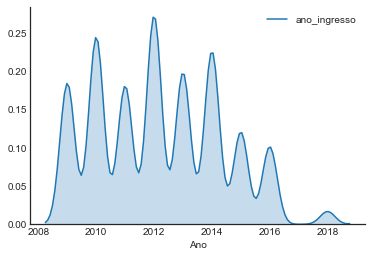

In [54]:
#Kernel density plot
sns.set_style("white")
sns.kdeplot(merge_coursesdis["ano_ingresso"], shade = True)
plt.xlabel("Ano")
sns.despine()
plt.show()

## Table with the amount each year's canceled entrants ###

In [55]:
x = pd.pivot_table(merge_coursesdis,
               index='ano_ingresso',
               values='nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
x

,ano_ingresso,nome_curso
0,2009,6816
1,2010,9061
2,2011,6701
3,2012,10115
4,2013,7355
5,2014,8395
6,2015,4472
7,2016,3759
8,2018,618


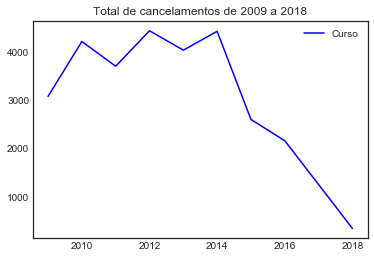

In [9]:
plt.plot(x['ano_ingresso'], 
         x['nome_curso'], c='blue', label='Curso')
plt.legend(loc='upper right')
plt.title('Total de cancelamentos de 2009 a 2018')
plt.show()

## Canceled entrants of some units##

#### Name of all unit ####

In [113]:
print(merge_coursesdis.unidade_responsavel.unique().tolist())

['CENTRO DE CIÊNCIAS SOCIAIS APLICADAS', 'CENTRO DE  ENSINO SUPERIOR DO SERIDÓ', 'ESCOLA AGRÍCOLA DE JUNDIAÍ', 'CENTRO DE TECNOLOGIA', 'CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES', 'CENTRO DE BIOCIÊNCIAS', 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA', 'ESCOLA DE CIÊNCIAS E TECNOLOGIA', 'CENTRO DE CIÊNCIAS DA SAÚDE', 'FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA', 'ESCOLA DE SAÚDE', 'ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE', 'ESCOLA DE MÚSICA', 'CENTRO DE EDUCAÇÃO', 'INSTITUTO METROPOLE DIGITAL']


### Humanities unit ###

In [131]:
humanities = merge_coursesdis[merge_coursesdis.unidade_responsavel == "CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"]
humanities.head()

,id_curso,area_conhecimento,campus,id_unidade_responsavel,unidade_responsavel,matricula,nome_discente,ano_ingresso,periodo_ingresso,tipo_discente,status,nivel_ensino,nome_curso,modalidade_educacao,id_unidade,nome_unidade
1437,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ADRIANA RODRIGUES DA SILVA,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1438,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ALICE TIBURCIO DE LIMA,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1439,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ANA BEATRIZ SOARES PIRES,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1440,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ANA CAROLINA GONÇALVES ROCHA,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"
1441,2000123,"Linguística, Letras e Artes",Campus Central,442,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES",2.009013e+09,ARANDÚ TESSAPORAM PINHEIRO,2009,1.0,REGULAR,CANCELADO,GRADUAÇÃO,ARTES VISUAIS,PRESENCIAL,442.0,"CENTRO DE CIÊNCIAS HUMANAS, LETRAS E ARTES"


#### Table with the amount of each year's canceled entrants on humanities unit ####

In [133]:
h = pd.pivot_table(humanities,
               index='ano_ingresso',
               values = 'nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
h.rename(columns={'nome_curso': 'amount'}, inplace=True)
h

,ano_ingresso,amount
0,2009,619
1,2010,672
2,2011,567
3,2012,771
4,2013,615
5,2014,772
6,2015,348
7,2016,288
8,2018,54


#### Graphic with the amount of each year's canceled entrants on humanities unit####

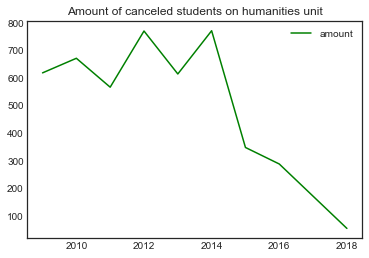

In [130]:
plt.plot(h['ano_ingresso'], 
         h['amount'], c='green', label='amount')
plt.legend(loc='upper right')
plt.title('Amount of canceled students on humanities unit')
plt.show()

### Math and Science unit ###

In [120]:
math_science = merge_coursesdis[merge_coursesdis.unidade_responsavel == "CENTRO DE CIÊNCIAS EXATAS E DA TERRA"]
math_science.head()
math_science.nome_curso.count()

4774

#### Table with the amount of each year's canceled entrants on 'math and science' unit ####

In [121]:
m = pd.pivot_table(math_science,
               index='ano_ingresso',
               values = 'nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
m.rename(columns={'nome_curso': 'amount'}, inplace=True)
m

,ano_ingresso,amount
0,2009,656
1,2010,939
2,2011,553
3,2012,756
4,2013,566
5,2014,665
6,2015,335
7,2016,277
8,2018,27


#### Graphic with the amount of each year's canceled entrants on 'math and science' unit ####

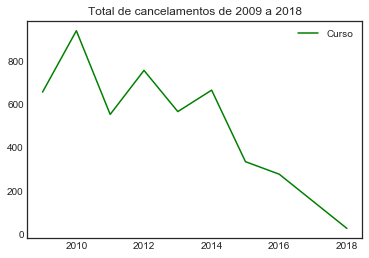

In [122]:
plt.plot(m['ano_ingresso'], 
         m['amount'], c='green', label='Curso')
plt.legend(loc='upper right')
plt.title('Total de cancelamentos de 2009 a 2018')
plt.show()

## Canceled entrants on IT ##

In [56]:
imd = merge_coursesdis[merge_coursesdis.nome_curso.str.contains("TECNOLOGIA DA INFORMAÇÃO")]
imd.head()

,nome_curso,id_coordenador,coordenador,situacao_curso,grau_academico,area_conhecimento,tipo_oferta,turno,tipo_ciclo_formacao,municipio,...,nome_discente,ano_ingresso,periodo_ingresso,tipo_discente,status,nivel_ensino,id_curso,modalidade_educacao,id_unidade,nome_unidade
55473,TECNOLOGIA DA INFORMAÇÃO,5756802.0,GUSTAVO GIRAO BARRETO DA SILVA,ATIVO,BACHARELADO,Ciências Exatas e da Terra,Regular,NaN,Dois ciclos,NATAL,...,ALESON BELO DA SILVA,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
55474,TECNOLOGIA DA INFORMAÇÃO,5756802.0,GUSTAVO GIRAO BARRETO DA SILVA,ATIVO,BACHARELADO,Ciências Exatas e da Terra,Regular,NaN,Dois ciclos,NATAL,...,ALEXANDRE TADEU DE FIGUEIREDO AZEVEDO,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
55475,TECNOLOGIA DA INFORMAÇÃO,5756802.0,GUSTAVO GIRAO BARRETO DA SILVA,ATIVO,BACHARELADO,Ciências Exatas e da Terra,Regular,NaN,Dois ciclos,NATAL,...,ALTEMAR ARIOSTENE SOLON,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
55476,TECNOLOGIA DA INFORMAÇÃO,5756802.0,GUSTAVO GIRAO BARRETO DA SILVA,ATIVO,BACHARELADO,Ciências Exatas e da Terra,Regular,NaN,Dois ciclos,NATAL,...,ALVARO EDUARDO SILVA SOARES,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL
55477,TECNOLOGIA DA INFORMAÇÃO,5756802.0,GUSTAVO GIRAO BARRETO DA SILVA,ATIVO,BACHARELADO,Ciências Exatas e da Terra,Regular,NaN,Dois ciclos,NATAL,...,ALYSON DAVID DE CARVALHO LIMA,2013,1.0,REGULAR,CANCELADO,GRADUAÇÃO,92127264.0,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL


#### Tabel with the amount of canceled entrants on IT between 2013 and 2018  ####

Detail: IT course started in 2013

In [124]:
y = pd.pivot_table(imd,
               index='ano_ingresso',
               values = 'nome_curso',
               aggfunc='count').fillna(0).astype(int).reset_index()
y.rename(columns={'nome_curso': 'amount'}, inplace=True)
y

,ano_ingresso,amount
0,2013,153
1,2014,163
2,2015,134
3,2016,111
4,2018,10


#### Graphic with the amount of canceled entrants on IT between 2013 and 2018 ####

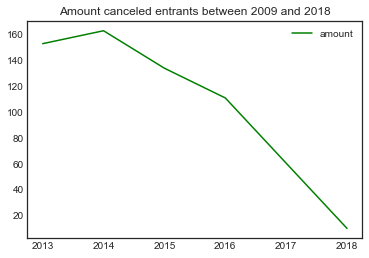

In [127]:
plt.plot(y['ano_ingresso'], 
         y['amount'], c='green', label='amount')
plt.legend(loc='upper right')
plt.title('Amount canceled entrants between 2009 and 2018')
plt.show()